In [ ]:
#from pyedflib import highlevel
import pandas as pd
import numpy as np
from glob import glob
from scipy.signal import butter, filtfilt
from scipy import signal
import seaborn as sns

In [ ]:
data_list = glob('*.csv')


In [ ]:
trains = [x for x in data_list if x.endswith('.csv')]

In [ ]:
data_list

['NU0001.csv']

In [ ]:
pd.read_csv(trains[0])

,Time,TIME_STAMP_s,TIME_STAMP_ms,OR_TIME_STAMP_s,OR_TIME_STAMP_ms,COUNTER,INTERPOLATED,AF3,F7,F3,...,EQ_P7,EQ_O1,EQ_O2,EQ_P8,EQ_T8,EQ_FC6,EQ_F4,EQ_F8,EQ_AF4,CQ_CMS
0,0.000000e+00,0.0169,-153.4107,0.0169,-153.1114,-18.0043,0.0,-9.7093,-17.4058,-16.1843,...,0.0170,-1.8322,-1.8322,-1.8322,-1.8475,-1.8338,-1.3741,-1.8475,-1.4049,0.0
1,7.812500e+00,0.0169,-150.9758,0.0169,-150.8184,-17.3581,0.0,-13.5848,-14.2006,-12.0390,...,0.0163,-1.6863,-1.6863,-1.6863,-1.7009,-1.6880,-1.2647,-1.7009,-1.2939,0.0
2,1.562500e+01,0.0178,-147.2216,0.0178,-147.4186,-16.8198,0.0,-13.8850,4.6985,-9.5427,...,0.0170,-1.8437,-1.8437,-1.8437,-1.8589,-1.8454,-1.3828,-1.8589,-1.4132,0.0
3,2.343750e+01,0.0170,-142.7541,0.0170,-143.0816,-16.1953,0.0,-20.2225,7.9842,-15.2738,...,0.0175,-2.0003,-2.0003,-2.0003,-2.0158,-2.0023,-1.5002,-2.0158,-1.5311,0.0
4,3.125000e+01,0.0166,-139.0065,0.0166,-139.0508,-15.3560,0.0,-23.2849,-5.7797,-17.8766,...,0.0167,-1.7151,-1.7151,-1.7151,-1.7296,-1.7173,-1.2863,-1.7296,-1.3153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155899,1.217961e+06,0.1905,-68.0654,0.1905,-68.3708,-23.8554,0.0,-25.2592,-14.6720,-5.0848,...,0.0000,0.0000,0.0336,0.0000,0.0000,0.0000,-0.0052,0.0000,0.0000,0.0
155900,1.217969e+06,0.1912,-65.4436,0.1912,-65.2840,-24.1681,0.0,-28.4921,-25.3370,-8.3981,...,0.0000,0.0000,0.0367,0.0000,0.0000,0.0000,-0.0050,0.0000,0.0000,0.0
155901,1.217977e+06,0.1816,-52.1999,0.1816,-52.1114,-21.9367,0.0,-19.1834,-21.2990,-14.1857,...,0.0000,0.0000,0.0366,0.0000,0.0000,0.0000,-0.0046,0.0000,0.0000,0.0
155902,1.217984e+06,0.1731,-39.0648,0.1731,-39.4717,-19.6556,0.0,-16.4344,-14.7711,-22.7097,...,0.0000,0.0000,0.0350,0.0000,0.0000,0.0000,-0.0045,0.0000,0.0000,0.0


In [ ]:
df = pd.DataFrame(pd.read_csv(trains[0]))

In [ ]:
df.columns

Index(['Time', 'TIME_STAMP_s', 'TIME_STAMP_ms', 'OR_TIME_STAMP_s',
       'OR_TIME_STAMP_ms', 'COUNTER', 'INTERPOLATED', 'AF3', 'F7', 'F3', 'FC5',
       'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'RAW_CQ',
       'BATTERY', 'BATTERY_PERCENT', 'MarkerIndex', 'MarkerType',
       'MarkerValueInt', 'MARKER_HARDWARE', 'CQ_AF3', 'CQ_F7', 'CQ_F3',
       'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8',
       'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_Overall', 'EQ_SampleRateQua',
       'EQ_OVERALL', 'EQ_AF3', 'EQ_F7', 'EQ_F3', 'EQ_FC5', 'EQ_T7', 'EQ_P7',
       'EQ_O1', 'EQ_O2', 'EQ_P8', 'EQ_T8', 'EQ_FC6', 'EQ_F4', 'EQ_F8',
       'EQ_AF4', 'CQ_CMS'],
      dtype='object')

In [ ]:
df = df.drop(['TIME_STAMP_s', 'TIME_STAMP_ms', 'OR_TIME_STAMP_s',
       'OR_TIME_STAMP_ms', 'COUNTER', 'INTERPOLATED', 'RAW_CQ',
       'BATTERY', 'BATTERY_PERCENT', 'MarkerIndex', 'MarkerType',
       'MarkerValueInt', 'MARKER_HARDWARE', 'CQ_AF3', 'CQ_F7', 'CQ_F3',
       'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8',
       'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_Overall', 'EQ_SampleRateQua',
       'EQ_OVERALL', 'EQ_AF3', 'EQ_F7', 'EQ_F3', 'EQ_FC5', 'EQ_T7', 'EQ_P7',
       'EQ_O1', 'EQ_O2', 'EQ_P8', 'EQ_T8', 'EQ_FC6', 'EQ_F4', 'EQ_F8',
       'EQ_AF4', 'CQ_CMS'], axis = 1)

In [ ]:
df

,Time,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,0.000000e+00,-9.7093,-17.4058,-16.1843,-15.7754,-17.5113,-31.1968,-17.7576,-15.8720,-7.6267,-7.9071,-7.1825,-16.9019,-13.1023,-19.6914
1,7.812500e+00,-13.5848,-14.2006,-12.0390,0.5378,-12.2669,-32.1791,-8.2367,-12.4330,-2.2445,-9.2967,-2.3454,-12.5543,-10.0714,4.6581
2,1.562500e+01,-13.8850,4.6985,-9.5427,11.6804,5.1075,-32.4636,0.2175,-6.1477,3.1905,-6.6203,-0.9423,-9.0881,-5.8910,21.8667
3,2.343750e+01,-20.2225,7.9842,-15.2738,1.8589,6.8039,-49.6212,-5.6604,-5.2300,-0.6999,-6.5409,-6.9505,-14.6058,-6.6975,9.6558
4,3.125000e+01,-23.2849,-5.7797,-17.8766,-3.4293,5.6021,-68.9582,-7.2625,-5.0875,-3.3021,-4.4075,-10.9782,-16.5950,-12.9011,-14.0589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155899,1.217961e+06,-25.2592,-14.6720,-5.0848,-18.9744,-18.8391,-14.4345,-16.5870,-14.2019,-6.9126,-9.6857,-20.2398,-19.0560,-6.6369,-17.9834
155900,1.217969e+06,-28.4921,-25.3370,-8.3981,-17.2266,-8.8209,-7.5986,-6.1144,-8.1877,-3.1173,0.8439,-14.2841,-16.9107,-4.9714,-15.0690
155901,1.217977e+06,-19.1834,-21.2990,-14.1857,-9.5308,3.9841,-1.6567,0.1610,-7.7099,-2.1428,8.3366,-10.3214,-19.0522,-3.4174,-15.8371
155902,1.217984e+06,-16.4344,-14.7711,-22.7097,-9.5948,-2.7370,-4.0855,-2.1656,-13.2754,-2.9850,0.7045,-14.4023,-21.6456,-5.5686,-20.4828


In [ ]:
df_f3 = df[['F3']]

In [ ]:
np_f3 = df_f3.values

In [ ]:
np_f3

array([[-16.1843],
       [-12.039 ],
       [ -9.5427],
       ...,
       [-14.1857],
       [-22.7097],
       [-27.2532]])

In [ ]:
np_f3.size

155904

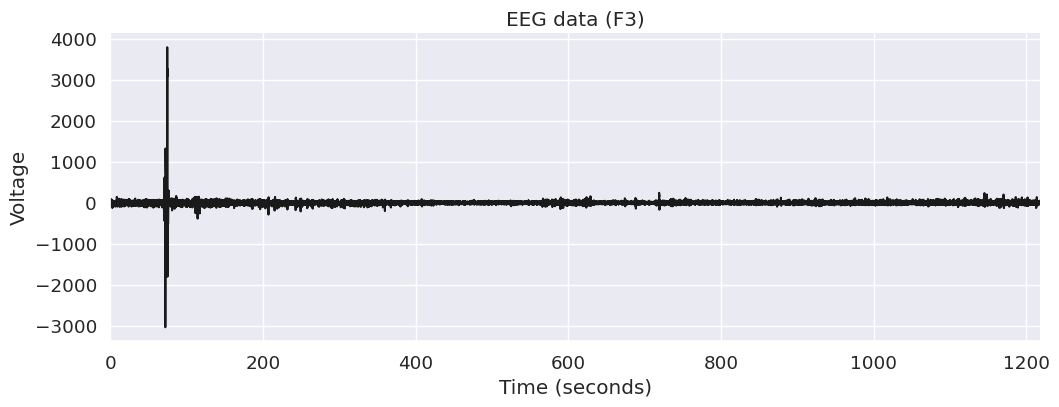

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 128.
time = np.arange(np_f3.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, np_f3, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('EEG data (F3)')
sns.despine()

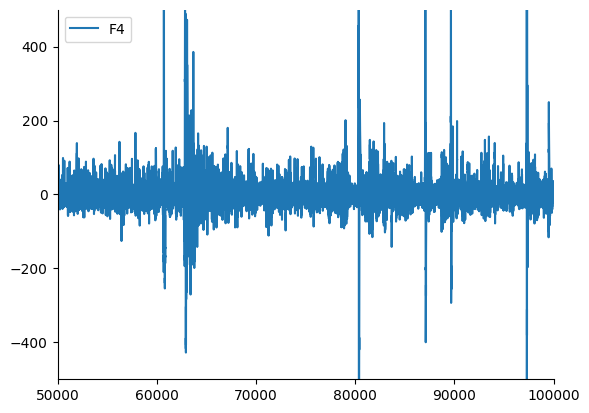

In [ ]:
# Assuming df is your DataFrame
#df['AF3'].plot(kind='line', figsize=(14, 8), title='NU0001', label='AF3')
#df['AF4'].plot(kind='line', label='AF4')
#df['F7'].plot(kind='line', label='F7')
#df['F3'].plot(kind='line', label='F3')
df['F4'].plot(kind='line', label='F4')
#df['F8'].plot(kind='line', label='F8')
#df['FC5'].plot(kind='line', label='FC5')
#df['FC6'].plot(kind='line', label='FC6')
#df['T7'].plot(kind='line', label='T7')
#df['T8'].plot(kind='line', label='T8')
#df['P7'].plot(kind='line', label='P7')
#df['P8'].plot(kind='line', label='P8')
#df['O1'].plot(kind='line', label='O1')
#df['O2'].plot(kind='line', label='O2')


plt.xlim(50000, 100000)
plt.ylim(-500, 500)
# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend()

# Show the plot
plt.show()


##  Density

In [ ]:
fs = 128
win = 4 * fs
freqs, psd = signal.welch(df_filtered['AF3'][17500:22500], fs, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
#plt.xlim([0, freqs.max()])
plt.xlim([0, 20])
sns.despine()

Delta power

In [ ]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

In [ ]:
# Relative delta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Theta power

In [ ]:
# Define Theta lower and upper limits
low, high = 4, 8

# Find intersecting values in frequency vector
idx_theta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the theta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_theta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
theta_power = simps(psd[idx_theta], dx=freq_res)
print('Absolute theta power: %.3f uV^2' % theta_power)

In [ ]:
# Relative theta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
theta_rel_power = theta_power / total_power
print('Relative theta power: %.3f' % theta_rel_power)

Alpha power

In [ ]:
# Define Alpha lower and upper limits
low, high = 8, 12

# Find intersecting values in frequency vector
idx_alpha = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the alpha area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_alpha, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 15])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
alpha_power = simps(psd[idx_alpha], dx=freq_res)
print('Absolute alpha power: %.3f uV^2' % alpha_power)

In [ ]:
# Relative alpha power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
alpha_rel_power = alpha_power / total_power
print('Relative alpha power: %.3f' % alpha_rel_power)

Beta power

In [ ]:
# Define Beta lower and upper limits
low, high = 12, 30

# Find intersecting values in frequency vector
idx_beta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the beta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_beta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 35])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
beta_power = simps(psd[idx_beta], dx=freq_res)
print('Absolute beta power: %.3f uV^2' % beta_power)

In [ ]:
# Relative beta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
beta_rel_power = beta_power / total_power
print('Relative beta power: %.3f' % beta_rel_power)

#Ratio clac

In [ ]:
def bandpower(data, fs, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * fs
    else:
        nperseg = (2 / low) * fs

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, fs, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp


In [ ]:
# Define the duration of the window to be 4 seconds

purpose = df_filtered['F3'][17500:22500]
win_sec = 5

# Delta/alpha ratio based on the absolute power
db = bandpower(purpose, fs, [0.5, 4], win_sec) / bandpower(purpose, fs, [8, 12], win_sec)

# Delta/alpha ratio based on the relative power
db_rel = bandpower(purpose, fs, [0.5, 4], win_sec, True) / bandpower(purpose, fs, [8, 12], win_sec, True)

print('Delta/alpha ratio (absolute): %.3f' % da)
print('Delta/alpha ratio (relative): %.3f' % da_rel)


# Theta/Beta ratio based on the absolute power
tb = bandpower(purpose, fs, [4, 8], win_sec) / bandpower(purpose, fs, [12, 30], win_sec)

# Theta/Beta ratio based on the relative power
tb_rel = bandpower(purpose, fs, [4, 8], win_sec, True) / bandpower(purpose, fs, [12, 30], win_sec, True)

print('Theta/Beta ratio (absolute): %.3f' % tb)
print('Theta/Beta ratio (relative): %.3f' % tb_rel)

# Theta/Alpha ratio based on the absolute power
ta = bandpower(purpose, fs, [4, 8], win_sec) / bandpower(purpose, fs, [8, 12], win_sec)

# Theta/Alpha ratio based on the relative power
ta_rel = bandpower(purpose, fs, [4, 8], win_sec, True) / bandpower(purpose, fs, [8, 12], win_sec, True)

print('Theta/Alpha ratio (absolute): %.3f' % ta)
print('Theta/Alpha ratio (relative): %.3f' % ta_rel)